### Implementation of classes, training steps, accuracy graph and trained model

In [98]:
import numpy as np

#### Implementation of Mean square error

In [99]:
def mean_squared_error(y_hat, y): # y_hat is the predicted value, y is the actual value
    """ Implementation of the mean squared error function """
    return np.sum((y_hat - y)**2)/y.size

In [100]:
y      = np.array([1,   2,   3,    4])
y_hat1 = np.array([1.2, 1.9, 2.9,  4.2]) 
mean_squared_error(y_hat1, y) # mean squared error for the given values

0.025000000000000022

In [101]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
# mean squared error for the given values
mean_squared_error(y_hat2, y)

1.0250000000000004

### Implementation of cross entropy error

In [102]:
def cross_entropy_error(y_hat, y): # cross entropy error function
    """ Implementation of cross entropy error function """
    return -np.sum(y*np.log(y_hat + 1e-7))

In [103]:
y = np.array([0, 1, 0, 0, 0]) # actual values

In [104]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0]) # predicted values

In [105]:
cross_entropy_error(y_hat1, y) # cross entropy error for the given values

0.3566748010815999

In [106]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0]) # predicted values

In [107]:
cross_entropy_error(y_hat2, y) # cross entropy error for the given values

2.9957302735559908

### Initializing Mnist data for training

In [108]:
from mnist_data import MnistData # importing the MnistData class from mnist_data.py
my_mnist = MnistData() # creating an object of the MnistData class


Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [109]:
(train_images, train_labels), (_, _) = my_mnist.load() # loading the mnist data

In [110]:
train_size = train_images.shape[0] # number of training images
batch_size = 32 # batch size


In [111]:
batch_mask = np.random.choice(train_size, batch_size) # randomly selecting 32 images from the training data
print(batch_mask)

[33085 35761 18165 54676 23916  9785 23198  7278 44993 37739 41420  9202
 56778 20345 58509 15125 14741 30361 42689 22450  8151 18370 38507 55965
 59564 48778 15223  2365 44933 33124 35491 19381]


In [112]:
train_size

60000

In [113]:
# for mini-batch training.
def cross_entropy_error(y_hat, y): # cross entropy error function
    """ Implementaion of cross entropy error function for mini-batch training"""
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [114]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [115]:
cross_entropy_error(y_hat_batch, y_batch) # cross entropy error for the given values

0.8573989640459981

In [116]:
(0.1/10e-50)

1e+48

### Implementation of numerical differentiation

In [117]:
def numerical_diff(f, x): # numerical differentiation
    """ Implementation of numerical differentiation for a given function f and a point x"""
    h = 10e-50
    return (f(x + h) - f(x))/h

In [118]:
def func(x): # function to be differentiated
    return x**2 + 0.1*x
    

In [119]:
numerical_diff(func, 0.8) # numerical differentiation of the function at x = 0.8

0.0

In [120]:
# more reasonable approximation for the derivative
def numerical_diff(f, x): 
    """ Implementation of numerical differentiation """
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [121]:
numerical_diff(func, 0.8) # numerical differentiation of the function at x = 0.8

1.6999999999994797

In [122]:
numerical_diff(func, 0.2) # numerical differentiation of the function at x = 0.2

0.49999999999994493

In [123]:
def func(x): # function to be differentiated
    return x[0]**2 + x[1]**2

def func_tmp1(x0): # function to be differentiated
    return x0**2 + 4.0**2

In [124]:
numerical_diff(func_tmp1, 3.0) # numerical differentiation of the function at x = 3.0

6.00000000000378

In [125]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [126]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

### Numerical Gradient

In [127]:
import numpy as np

In [128]:
def func2(x):
    return x[0]**2 + x[1]**2

In [129]:
# partial derivatives when x0 = 3, x1 = 4

def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [130]:
def _numerical_diff(f, x): # numerical differentiation
    """ Implementation of numerical differentiation """
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [131]:
def _numerical_gradient(f, x): # numerical gradient
    """Implementation of numerical gradient for a function f at point x"""
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad



In [132]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [133]:
_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [134]:
_numerical_gradient(func2, np.array([3.0, 4.0]))


array([6., 8.])

### Implementation of gradient descent

In [135]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100): # gradient descent function for optimization
    """ implement the gradient descent algorithm for optimization"""
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [136]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001) # optimization of the function

array([5.65680105e-06, 2.02028609e-06])

### Implementation of SimpleNet

In [137]:
class SimpleNet:
    """ 
    A simple neural network with a single layer, implementing forward propagation,
    softmax activation, and cross-entropy loss. This network is used for multi-class
    classification problems.
    """
    def __init__(self):
        """
        Initializes the SimpleNet with random weights for the input layer.
        """
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        """  Computes the softmax activation function.

        Softmax converts raw output scores (logits) into probability distributions 
        over classes by normalizing them."""
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        """ Computes the cross-entropy error between the predicted output `y` and the true labels `t`.

        The cross-entropy loss is commonly used for classification problems. It calculates
        the difference between the predicted probabilities and the true class labels."""
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        """  Computes the numerical gradient of a function `f` with respect to `x` using finite differences. """
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        """Performs a forward pass through the network and computes the predicted output. """
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        """ Computes the loss (cross-entropy error) for a given input `x` and true label `y`.

        The loss is computed by first passing the input through the network to get the
        predicted output and then calculating the cross-entropy loss."""
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [138]:
# testing SimpleNet
net = SimpleNet() # creating an object of the SimpleNet class
print(net.w) # weights of the network

[[ 0.13566702 -0.95093142  0.56273777]
 [-0.84326872  0.32122329 -1.48741569]]


In [139]:
x = np.array([0.7, 0.19]) # input to the network
p = net.predict(x) # prediction of the network
print(p)

[-0.06525415 -0.60461957  0.11130746]


In [140]:
np.argmax(p) # index of the maximum value in the prediction

2

In [141]:
y = np.array([0, 1, 0]) # true label
net.loss(x, y) # loss of the network

1.5604574334774888

In [142]:
y = np.array([0, 0, 1]) # true label
net.loss(x, y) # loss for the given input and true label

0.8445306482681669

In [143]:
def loss_function(w): # loss function
    return net.loss(x, y)

In [144]:
dw = net.numerical_gradient(loss_function, net.w) # gradient of the loss function
print(dw)

[[ 0.25214079  0.14702787 -0.39916866]
 [ 0.06843821  0.03990757 -0.10834578]]


In [145]:
# using lamda
loss_function = lambda w: net.loss(x, y) # loss function

In [146]:
dw = net.numerical_gradient(loss_function, net.w) # gradient of the loss function
print(dw)

[[ 0.25214079  0.14702787 -0.39916866]
 [ 0.06843821  0.03990757 -0.10834578]]


### Implementation of TwoLayerNet class

In [147]:
class Activations:
    """ A class to handle different types of activations for neural networks."""
    def sigmoid(self, x):
        """Sigmoid activation function implementation"""
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        """Softmax activation function implementation"""
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


In [148]:
class Errors:
    """ A class to handle different types of errors for neural networks."""
    def cross_entroy_error(self, y, t):
        """Calculates the cross-entropy error between the predicted and true labels."""
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [149]:
import activations
import errors

In [150]:
class TwoLayerNet:
    """A simple two-layer neural network with one hidden layer, used for classification tasks.

    This class implements a feedforward neural network with one hidden layer. The network 
    uses the sigmoid activation function for the hidden layer and softmax activation for 
    the output layer. It also includes methods for computing the loss (cross-entropy), 
    predicting the output, and calculating the accuracy. Gradient computation is performed 
    numerically. """
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """Initializes the two-layer neural network with random weights and biases."""
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        """Performs a forward pass through the network and returns the predicted output. """
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        """Computes the loss (cross-entropy) for a given input and true label. """
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        """Calculates the accuracy of the network for a given input and true label. """
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        """Computes the numerical gradient of a function `f` with respect to `x` using finite differences."""
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        """Computes the numerical gradient of the loss function with respect to the weights."""
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads
    

### Training the TwoLayerNet

In [151]:
from mnist_data import MnistData
import matplotlib.pyplot as plt
import numpy as np

In [152]:
my_mnist = MnistData()

Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [153]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [154]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [155]:

network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10) # creating an object of the TwoLayerNet class

In [156]:
network.params # weights and biases of the network

{'w1': array([[-0.00711662,  0.01334689,  0.00053283, ..., -0.00439923,
          0.00933688, -0.00413704],
        [ 0.00937496, -0.00334308, -0.0043983 , ..., -0.00304115,
          0.01632827, -0.00340226],
        [-0.00171596,  0.00688549,  0.00086869, ...,  0.01601761,
          0.00346632,  0.00999029],
        ...,
        [-0.01353928, -0.00156907,  0.01366574, ...,  0.00753212,
          0.00895732, -0.0066174 ],
        [ 0.03274926, -0.00576418,  0.00083674, ..., -0.00400445,
         -0.00984168, -0.00178521],
        [ 0.01219621,  0.00717279,  0.00182846, ...,  0.002376  ,
         -0.00851964,  0.0046679 ]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [166]:
iterations = 10 #10000
train_size = x_train[:100].shape[0]
batch_size = 2 #100
lr = 0.1

iter_per_epoch = max(train_size/batch_size, 1)


In [167]:
print(iter_per_epoch)

50.0


In [168]:
train_losses = []
train_accs = []
test_accs = []


In [169]:
for i in range(iterations): # training the network
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%int(iter_per_epoch) == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')
    

train acc, test_acc : 0.09871666666666666, 0.098


### Accuracy graph

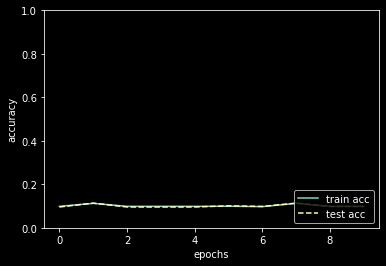

In [160]:
markers = {'train': 'o', 'test': 's'} # plotted for 10 outputs from the above and stopped the cell as it' taking too long to run
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


## Backpropagation

In [170]:
class Relu:
    """Implemenatation of the ReLU activation function."""
    def __init__(self):
        self.mask = None

    def forward(self, x):
        """ Forward pass of the ReLU activation function."""
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        """ backward pass of the ReLU activation function."""
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    """Implementation of the Sigmoid activation function."""
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        """ forward pass of the Sigmoid activation function."""
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        """ backward pass of the Sigmoid activation function."""
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    """ Implementation of the Affine layer in a neural network."""
    def __init__(self, w, b):
        """ initializes the Affine layer with weights and biases."""
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        """ forward pass of the Affine layer."""
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        """ backward pass of the Affine layer."""
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx


class SoftmaxWithLoss:
    """ Implementation of the Softmax activation function with cross-entropy loss."""
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        """ forward pass of the Softmax function with cross-entropy loss."""
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        """ backward pass of the Softmax function with cross-entropy loss."""
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

### Two Layer Net with Backpropagation

In [171]:
import numpy as np
from activations import Activations
from errors import Errors

In [172]:
from collections import OrderedDict

In [173]:
class TwoLayerNetWithBackProp:
    """
    A two-layer neural network with backpropagation.
    The network has:
        - One hidden layer with ReLU activation.
        - One output layer with softmax and cross-entropy loss.
    """
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """ Initializes the two-layer neural network with specified sizes for the input,
        hidden, and output layers. It also initializes the weights and biases. """
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.update_layers()
        self.last_layer = SoftmaxWithLoss()


    def update_layers(self):
        """
        Updates the layers in the network. It includes:
            - An affine layer (linear transformation) followed by ReLU for the hidden layer.
            - An affine layer for the output layer.
        """
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])


    def predict(self, x):
        """ Performs a forward pass through the network and returns the predicted output. """
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        """ Computes the loss (cross-entropy) for a given input and true label. """
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        """ Calculates the accuracy of the network for a given input and true label. """
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        """ Computes the gradient of the loss function with respect to the weights using backpropagation. """
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [174]:
from mnist_data import MnistData # importing the MnistData class from mnist_data.py

In [175]:
mnist = MnistData() # creating an object of the MnistData class

Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [176]:
(x_train, y_train), (x_test, y_test) = mnist.load() # loading the mnist data

In [177]:
print(x_train.shape) # shape of the training data

(60000, 784)


In [178]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10) # creating an object of the TwoLayerNetWithBackProp class

In [179]:
iterations = 10000 # number of iterations
train_size = x_train.shape[0] # number of training images
batch_size = 100 # batch size
lr = 0.1 # learning rate

iter_per_ecoph = max(train_size/batch_size, 1) # iterations per epoch


In [180]:
train_losses = []
train_accs = []
test_accs = []

### Training steps

In [181]:
for i in range(iterations): # training the network
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')
    

train acc, test_acc : 0.13263333333333333, 0.1423
train acc, test_acc : 0.9073666666666667, 0.9096
train acc, test_acc : 0.9246, 0.927
train acc, test_acc : 0.9396, 0.9392
train acc, test_acc : 0.95015, 0.9482
train acc, test_acc : 0.9558333333333333, 0.953
train acc, test_acc : 0.9606166666666667, 0.9555
train acc, test_acc : 0.9656666666666667, 0.9602
train acc, test_acc : 0.96795, 0.9637
train acc, test_acc : 0.97115, 0.9671
train acc, test_acc : 0.97375, 0.9672
train acc, test_acc : 0.9759333333333333, 0.9706
train acc, test_acc : 0.97755, 0.9707
train acc, test_acc : 0.9796333333333334, 0.9737
train acc, test_acc : 0.97855, 0.9721
train acc, test_acc : 0.9820333333333333, 0.973
train acc, test_acc : 0.9832166666666666, 0.9744


### Accuracy graph

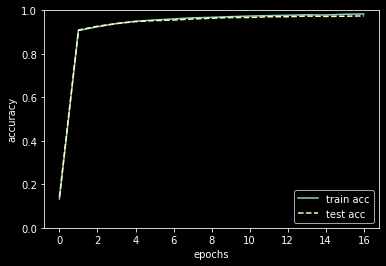

In [182]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [183]:
import numpy as np
import pickle

my_weight_pkl_file = 'kolluru_mnist_model.pkl' 

In [184]:


with open(f'{my_weight_pkl_file}', 'wb') as f: # saving the weights of the network
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 


Pickle: kolluru_mnist_model.pkl is being created.
Done.


In [185]:
network.params = None # removing the weights of the network

### Using your own TwoLayerNet model

In [186]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10) # creating an object of the TwoLayerNetWithBackProp class

In [187]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

network.update_layers() # updating the layers of the network

In [188]:
from mnist_data import MnistData

In [189]:
mnist = MnistData()
(_, _), (x_test, y_test) = mnist.load() # loading the mnist data

Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [190]:
y_hat = network.predict(x_test[0:100]) # prediction of the network


In [191]:
import matplotlib.pyplot as plt

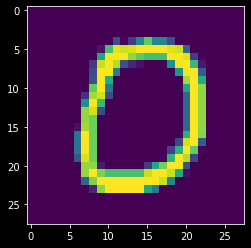

In [192]:
plt.imshow(x_test[10].reshape(28,28)) # displaying the image

In [193]:
y_hat[10]

array([12.04469713, -3.49668219,  5.01952293, -0.91343689, -6.93159854,
       -0.37976285, -1.07778246, -2.12899779, -4.740167  ,  2.28737169])

In [194]:
y_hat[10]

array([12.04469713, -3.49668219,  5.01952293, -0.91343689, -6.93159854,
       -0.37976285, -1.07778246, -2.12899779, -4.740167  ,  2.28737169])

In [195]:
np.argmax(y_hat[10])

0

In [196]:
np.argmax(y_test[10])

0

### Using Handwritten images to test twolayernetwithbackprop

In [197]:
import os

# Directory with images 
image_dir = "./"

# Loop to test each handwritten digit image
for digit in range(10):
    for index in range(5):  # since there are five images per digit
        filename = f"{digit}_{index}.png"
        filepath = os.path.join(image_dir, filename)
        if os.path.exists(filepath):
            print(f"Testing {filename}...")
            # Running the Python script with image filename and correct digit as arguments
            !python module6.py {filename} {digit}
        else:
            print(f"{filename} not found.")

Testing 0_0.png...
Figure(640x480)
Success: Image 0_0.png is for digit 0 and recognized as 0.
Testing 0_1.png...
Figure(640x480)
Success: Image 0_1.png is for digit 0 and recognized as 0.
Testing 0_2.png...
Figure(640x480)
Success: Image 0_2.png is for digit 0 and recognized as 0.
Testing 0_3.png...
Figure(640x480)
Success: Image 0_3.png is for digit 0 and recognized as 0.
Testing 0_4.png...
Figure(640x480)
Success: Image 0_4.png is for digit 0 and recognized as 0.
Testing 1_0.png...
Figure(640x480)
Success: Image 1_0.png is for digit 1 and recognized as 1.
Testing 1_1.png...
Figure(640x480)
Success: Image 1_1.png is for digit 1 and recognized as 1.
Testing 1_2.png...
Figure(640x480)
Success: Image 1_2.png is for digit 1 and recognized as 1.
Testing 1_3.png...
Figure(640x480)
Success: Image 1_3.png is for digit 1 and recognized as 1.
Testing 1_4.png...
Figure(640x480)
Success: Image 1_4.png is for digit 1 and recognized as 1.
Testing 2_0.png...
Figure(640x480)
Success: Image 2_0.png is